# **Telecom Churn Case Study(Machine learning -II)**


## By, Hareesh Rajasekharan & Richard Samuel

## **Business problem overview**

### *In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.*

## **Business Goal**
### - Retaining high profitable customers.
### - Predict which customers are at high risk of churn.
### - Identify the main indicators of churn.

## **Business objective**
### - Understanding the typical customer behaviour during churn.
### - To predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

## **Importing necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import re

### **Loading and initial inspection of data**

In [2]:
churn = pd.read_csv("telecom_churn_data.csv")
churn.head(5)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
# Let us Look the Shape and Info of Dataset

print("Checking the Shape of the dataSet")
print("--------------------------------")
print(churn.shape)
print("\n===================================================\n")
print("Checking the Info attributes and stats of the dataSet")
print("--------------------------------------------------")
print(churn.info())

Checking the Shape of the dataSet
--------------------------------
(99999, 226)


Checking the Info attributes and stats of the dataSet
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB
None


In [4]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## **Data Preparation**

### 1. Derive new features
### 2. Filter high-value customers
### 3. Tag churners and remove attributes of the churn phase

### **Data Cleaning**

In [5]:
# Computing the percentage of null values and sorting in descending order

Percentage_Missing= ((churn.isnull().mean().round(4)*100).sort_values(ascending=False))
Percentage_Missing

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

### **Extracting high value customers**

### *We'll identify customers that recharged for an amount more than or equal to X, where X is the 70th percentile of the average recharge amount throughout the good phase's first two months.*

### The columns holding "Recharge amount data" are critical for determining which clients have a high value. 
### As a result, these columns with null values are imputed with 0.

In [6]:
# Imputing null values with 0
churn['av_rech_amt_data_6'] = churn['av_rech_amt_data_6'].replace(np.NaN,0.0)
churn['av_rech_amt_data_7'] = churn['av_rech_amt_data_7'].replace(np.NaN,0.0)
churn['av_rech_amt_data_8'] = churn['av_rech_amt_data_8'].replace(np.NaN,0.0)
churn['av_rech_amt_data_9'] = churn['av_rech_amt_data_9'].replace(np.NaN,0.0)
churn['total_rech_data_6'] = churn['total_rech_data_6'].replace(np.NaN,0.0)
churn['total_rech_data_7'] = churn['total_rech_data_7'].replace(np.NaN,0.0)
churn['total_rech_data_8'] = churn['total_rech_data_8'].replace(np.NaN,0.0)
churn['total_rech_data_9'] = churn['total_rech_data_9'].replace(np.NaN,0.0)

In [7]:
# Checking the values after imputation
print(churn['av_rech_amt_data_6'].isnull().mean())
print(churn['av_rech_amt_data_7'].isnull().mean())
print(churn['av_rech_amt_data_8'].isnull().mean())
print(churn['av_rech_amt_data_9'].isnull().mean())
print(churn['total_rech_data_6'].isnull().mean())
print(churn['total_rech_data_7'].isnull().mean())
print(churn['total_rech_data_8'].isnull().mean())
print(churn['total_rech_data_9'].isnull().mean())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [8]:
# Imputing important columns with 0 before model building.
churn['max_rech_data_6'] = churn['max_rech_data_6'].replace(np.NaN,0.0)
churn['max_rech_data_7'] = churn['max_rech_data_7'].replace(np.NaN,0.0)
churn['max_rech_data_8'] = churn['max_rech_data_8'].replace(np.NaN,0.0)
churn['count_rech_2g_6'] = churn['count_rech_2g_6'].replace(np.NaN,0.0)
churn['count_rech_2g_7'] = churn['count_rech_2g_7'].replace(np.NaN,0.0)
churn['count_rech_2g_8'] = churn['count_rech_2g_8'].replace(np.NaN,0.0)
churn['count_rech_3g_6'] = churn['count_rech_3g_6'].replace(np.NaN,0.0)
churn['count_rech_3g_7'] = churn['count_rech_3g_7'].replace(np.NaN,0.0)
churn['count_rech_3g_8'] = churn['count_rech_3g_8'].replace(np.NaN,0.0)
churn['arpu_2g_6'] = churn['arpu_2g_6'].replace(np.NaN,0.0)
churn['arpu_2g_7'] = churn['arpu_2g_7'].replace(np.NaN,0.0)
churn['arpu_2g_8'] = churn['arpu_2g_8'].replace(np.NaN,0.0)
churn['arpu_3g_6'] = churn['arpu_3g_6'].replace(np.NaN,0.0)
churn['arpu_3g_7'] = churn['arpu_3g_7'].replace(np.NaN,0.0)
churn['arpu_3g_8'] = churn['arpu_3g_8'].replace(np.NaN,0.0)
churn['night_pck_user_6'] = churn['night_pck_user_6'].replace(np.NaN,0.0)
churn['night_pck_user_7'] = churn['night_pck_user_7'].replace(np.NaN,0.0)
churn['night_pck_user_8'] = churn['night_pck_user_8'].replace(np.NaN,0.0)
churn['fb_user_6'] = churn['fb_user_6'].replace(np.NaN,0.0)
churn['fb_user_7'] = churn['fb_user_7'].replace(np.NaN,0.0)
churn['fb_user_8'] = churn['fb_user_8'].replace(np.NaN,0.0)

In [9]:
# Finding the null value percentage and sorting in descending order after imputing
Percentage_Missing= ((churn.isnull().mean().round(4)*100).sort_values(ascending=False))
Percentage_Missing

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
arpu_2g_9                   74.08
date_of_last_rech_data_9    74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_3g_9                   74.08
fb_user_9                   74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
date_of_last_rech_data_8    73.66
loc_og_t2c_mou_9             7.75
loc_og_mou_9                 7.75
loc_og_t2f_mou_9             7.75
std_og_t2t_mou_9             7.75
std_og_t2m_mou_9             7.75
loc_og_t2m_mou_9             7.75
std_ic_t2f_mou_9             7.75
loc_og_t2t_mou_9             7.75
std_og_mou_9                 7.75
isd_og_mou_9                 7.75
ic_others_9                  7.75
isd_ic_mou_9                 7.75
spl_ic_mou_9                 7.75
spl_og_mou_9                 7.75
std_ic_mou_9                 7.75
std_ic_t2o_mou_9             7.75
std_ic_t2m_mou_9             7.75
std_ic_t2t_mou_9             7.75
loc_ic_mou_9  

### **Creating new fetures for calculating average recharge amount**

#### **Calculating the following:-**

#### - Total number of 2G recharges done for the month of June, Jully and August
#### - Total number of 3G recharges done for the month of June, Jully and August

### Now let's calculate the total amount spent for internet/data recharges by multiplying total number of recharges with the average recharge amount.
### Calcuting the total amount spent for data and talktime

In [10]:
# Sum of all types of data recharge in the month
churn['total_rech_num_data_6'] = (churn['count_rech_2g_6']+churn['count_rech_3g_6']).astype(int)
churn['total_rech_num_data_7'] = (churn['count_rech_2g_7']+churn['count_rech_3g_7']).astype(int)
churn['total_rech_num_data_8'] = (churn['count_rech_2g_8']+churn['count_rech_3g_8']).astype(int)

In [11]:
# Total amount spent on data(mobile internet)
churn['total_rech_amt_data_6'] = churn['total_rech_num_data_6']*churn['av_rech_amt_data_6']
churn['total_rech_amt_data_7'] = churn['total_rech_num_data_7']*churn['av_rech_amt_data_7']
churn['total_rech_amt_data_8'] = churn['total_rech_num_data_8']*churn['av_rech_amt_data_8']

#### Now, add the amounts spent on mobile data and call time to determine the total cost spent on recharge.

In [12]:
# Total monthly recharge for data and talk time
churn['total_month_rech_6'] = churn['total_rech_amt_6']+churn['total_rech_amt_data_6']
churn['total_month_rech_7'] = churn['total_rech_amt_7']+churn['total_rech_amt_data_7']
churn['total_month_rech_8'] = churn['total_rech_amt_8']+churn['total_rech_amt_data_8']

### High Value Customer Extraction

#### The high value customers are extracted based on the average recharge amount in the first two months (The good phase)

In [13]:
# Extracting high value customers based on the average recharge amount
high_val_cust=churn[churn[['total_month_rech_6','total_month_rech_7']].mean(axis=1)> churn[['total_month_rech_6','total_month_rech_7']].mean(axis=1).quantile(0.7)]

In [14]:
# Checking the number of features and observations in new dataset
print("There are total %d features." %high_val_cust.shape[1])
print("There are total %d observations." %high_val_cust.shape[0])

There are total 235 features.
There are total 29953 observations.


### Tagging churners and removing attributes of the churn phase

- The following features of 9th month will be used for identifying the churned customers:-

1. total_ic_mou_9
2. total_og_mou_9
3. vol_2g_mb_9
4. vol_3g_mb_9

If the customer is churn we will tag him as 1, else 0.

- Customers who have not made any calls and have not used mobile internet during 9th month will be considered as churn customers.

- We shall remove the attributes of 9th month after tagging the churn customers to avoid overfitting.

In [15]:
col1 = [ 'vol_2g_mb_9','vol_3g_mb_9','total_ic_mou_9','total_og_mou_9']
high_val_cust['churn']=high_val_cust[col1].apply(lambda x: 1 if ((x['vol_2g_mb_9']==0) & (x['vol_3g_mb_9']==0.0) & (x['total_ic_mou_9']==0) & (x['total_og_mou_9']==0)) else 0, axis=1)

In [16]:
print("Total number of Churned customers:- ",len(high_val_cust[high_val_cust['churn']==1]))
print("Total number of non-churned customers:- ",len(high_val_cust[high_val_cust['churn']==0]))

Total number of Churned customers:-  2433
Total number of non-churned customers:-  27520


#### Removing the attributes of 9th month (Churn Phase)

In [17]:
import re
month_9 = high_val_cust.filter(regex=('_9')).columns
high_val_cust.drop(month_9,axis=1,inplace=True)

In [18]:
# Checking the number of features and observations in new dataset
print("There are total %d features." %high_val_cust.shape[1])
print("There are total %d observations." %high_val_cust.shape[0])

There are total 182 features.
There are total 29953 observations.


### **Dropping non-important features**

#### Circle ID and mobile phone number are non-essential features for analysis and model creation. As a result, those columns have been removed.

In [19]:
high_val_cust.circle_id.value_counts()
high_val_cust.drop(['circle_id','mobile_number'],axis=1,inplace=True)

#### Checking date column format and converting to correct date type

In [20]:
# Extracting  date columns
date_col = high_val_cust.filter(regex=('date')).columns
date_col

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8'], dtype='object')

In [21]:
# Converting dtype of date columns to datetime
high_val_cust['last_date_of_month_6'] = pd.to_datetime(high_val_cust['last_date_of_month_6'], format='%m/%d/%Y')
high_val_cust['last_date_of_month_7'] = pd.to_datetime(high_val_cust['last_date_of_month_7'], format='%m/%d/%Y')
high_val_cust['last_date_of_month_8'] = pd.to_datetime(high_val_cust['last_date_of_month_8'], format='%m/%d/%Y')
high_val_cust['date_of_last_rech_6'] = pd.to_datetime(high_val_cust['date_of_last_rech_6'], format='%m/%d/%Y')
high_val_cust['date_of_last_rech_7'] = pd.to_datetime(high_val_cust['date_of_last_rech_7'], format='%m/%d/%Y')
high_val_cust['date_of_last_rech_8'] = pd.to_datetime(high_val_cust['date_of_last_rech_8'], format='%m/%d/%Y')
high_val_cust['date_of_last_rech_data_6'] = pd.to_datetime(high_val_cust['date_of_last_rech_data_6'], format='%m/%d/%Y')
high_val_cust['date_of_last_rech_data_7'] = pd.to_datetime(high_val_cust['date_of_last_rech_data_7'], format='%m/%d/%Y')
high_val_cust['date_of_last_rech_data_8'] = pd.to_datetime(high_val_cust['date_of_last_rech_data_8'], format='%m/%d/%Y')

In [22]:
high_val_cust.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,29730.0,29730.0,29730.0,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.00000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.00000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.0,29417.0,28781.0,29411.000000,29417.00000,28781.000000,29953.000000,29953.000000,29953.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29411.000000,29417.000000,28781.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,2995

#### Certain columns appear to contain only zeroes and null values. These columns should be identified and dropped.

In [23]:
print(high_val_cust['loc_og_t2o_mou'].unique())
print(high_val_cust['std_og_t2o_mou'].unique())
print(high_val_cust['loc_ic_t2o_mou'].unique())
print(high_val_cust['std_og_t2c_mou_6'].unique())
print(high_val_cust['std_og_t2c_mou_7'].unique())
print(high_val_cust['std_og_t2c_mou_8'].unique())
print(high_val_cust['std_ic_t2o_mou_6'].unique())
print(high_val_cust['std_ic_t2o_mou_7'].unique())
print(high_val_cust['std_ic_t2o_mou_8'].unique())

[ 0. nan]
[ 0. nan]
[ 0. nan]
[nan  0.]
[nan  0.]
[ 0. nan]
[nan  0.]
[nan  0.]
[ 0. nan]


In [24]:
# Dropping the above columns having only null or 0 as values
high_val_cust.drop(['loc_og_t2o_mou'],inplace=True,axis=1)
high_val_cust.drop(['std_og_t2o_mou'],inplace=True,axis=1)
high_val_cust.drop(['loc_ic_t2o_mou'],inplace=True,axis=1)
high_val_cust.drop(['std_og_t2c_mou_6'],inplace=True,axis=1)
high_val_cust.drop(['std_og_t2c_mou_7'],inplace=True,axis=1)
high_val_cust.drop(['std_og_t2c_mou_8'],inplace=True,axis=1)
high_val_cust.drop(['std_ic_t2o_mou_6'],inplace=True,axis=1)
high_val_cust.drop(['std_ic_t2o_mou_7'],inplace=True,axis=1)
high_val_cust.drop(['std_ic_t2o_mou_8'],inplace=True,axis=1)

#### Creating a function that returns the percentage of null values.

In [25]:
def nullvalue(cutoff):
    null = (100*(high_val_cust.isnull().sum())/len(high_val_cust.index))
    print("{} features have more than {}% null values".format(len(null.loc[null > cutoff]),cutoff))
    return null.loc[null > cutoff]
nullvalue(40)

3 features have more than 40% null values


date_of_last_rech_data_6    44.112443
date_of_last_rech_data_7    43.117551
date_of_last_rech_data_8    46.799987
dtype: float64

In [26]:
# Dropping these columns as these are non-relevant for model building
high_val_cust.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],inplace=True,axis=1)

In [27]:
# Checking the nullvalue % >3
missing_3 = list(nullvalue(3).index)
missing_3

27 features have more than 3% null values


['onnet_mou_8',
 'offnet_mou_8',
 'roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_mou_8',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_8',
 'std_og_mou_8',
 'isd_og_mou_8',
 'spl_og_mou_8',
 'og_others_8',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'isd_ic_mou_8',
 'ic_others_8']

In [28]:
# Imputing all these columns with '0' as they are important for model building
high_val_cust[missing_3]=high_val_cust[missing_3].replace(np.nan, 0)

In [29]:
high_val_cust.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

#### In order to develop a model, the remaining date columns must be verified for imputation.

In [30]:
# By using the nullvalue function, we could understand that 3 date columns are having null values
nullvalue(0)

59 features have more than 0% null values


last_date_of_month_7    0.090141
last_date_of_month_8    0.550863
onnet_mou_6             1.809502
onnet_mou_7             1.789470
offnet_mou_6            1.809502
offnet_mou_7            1.789470
roam_ic_mou_6           1.809502
roam_ic_mou_7           1.789470
roam_og_mou_6           1.809502
roam_og_mou_7           1.789470
loc_og_t2t_mou_6        1.809502
loc_og_t2t_mou_7        1.789470
loc_og_t2m_mou_6        1.809502
loc_og_t2m_mou_7        1.789470
loc_og_t2f_mou_6        1.809502
loc_og_t2f_mou_7        1.789470
loc_og_t2c_mou_6        1.809502
loc_og_t2c_mou_7        1.789470
loc_og_mou_6            1.809502
loc_og_mou_7            1.789470
std_og_t2t_mou_6        1.809502
std_og_t2t_mou_7        1.789470
std_og_t2m_mou_6        1.809502
std_og_t2m_mou_7        1.789470
std_og_t2f_mou_6        1.809502
std_og_t2f_mou_7        1.789470
std_og_mou_6            1.809502
std_og_mou_7            1.789470
isd_og_mou_6            1.809502
isd_og_mou_7            1.789470
spl_og_mou

### Analysing the date column for imputation.
We can see that the columns are all filled with data from the same month. As a result, the null values are imputed using the "fillna - pad" approach.

In [31]:
high_val_cust['date_of_last_rech_6'].unique()

array(['2014-06-21T00:00:00.000000000', '2014-06-27T00:00:00.000000000',
       '2014-06-25T00:00:00.000000000', '2014-06-30T00:00:00.000000000',
       '2014-06-18T00:00:00.000000000', '2014-06-24T00:00:00.000000000',
       '2014-06-29T00:00:00.000000000', '2014-06-28T00:00:00.000000000',
       '2014-06-17T00:00:00.000000000',                           'NaT',
       '2014-06-20T00:00:00.000000000', '2014-06-22T00:00:00.000000000',
       '2014-06-13T00:00:00.000000000', '2014-06-26T00:00:00.000000000',
       '2014-06-16T00:00:00.000000000', '2014-06-12T00:00:00.000000000',
       '2014-06-15T00:00:00.000000000', '2014-06-07T00:00:00.000000000',
       '2014-06-14T00:00:00.000000000', '2014-06-08T00:00:00.000000000',
       '2014-06-23T00:00:00.000000000', '2014-06-19T00:00:00.000000000',
       '2014-06-02T00:00:00.000000000', '2014-06-04T00:00:00.000000000',
       '2014-06-06T00:00:00.000000000', '2014-06-10T00:00:00.000000000',
       '2014-06-05T00:00:00.000000000', '2014-06-11

In [32]:
high_val_cust['date_of_last_rech_7'].unique()

array(['2014-07-16T00:00:00.000000000', '2014-07-25T00:00:00.000000000',
       '2014-07-31T00:00:00.000000000', '2014-07-07T00:00:00.000000000',
       '2014-07-30T00:00:00.000000000', '2014-07-28T00:00:00.000000000',
       '2014-07-22T00:00:00.000000000', '2014-07-23T00:00:00.000000000',
       '2014-07-26T00:00:00.000000000', '2014-07-29T00:00:00.000000000',
       '2014-07-27T00:00:00.000000000', '2014-07-19T00:00:00.000000000',
       '2014-07-20T00:00:00.000000000', '2014-07-24T00:00:00.000000000',
       '2014-07-15T00:00:00.000000000', '2014-07-09T00:00:00.000000000',
       '2014-07-13T00:00:00.000000000', '2014-07-21T00:00:00.000000000',
                                 'NaT', '2014-07-05T00:00:00.000000000',
       '2014-07-18T00:00:00.000000000', '2014-07-17T00:00:00.000000000',
       '2014-07-12T00:00:00.000000000', '2014-07-04T00:00:00.000000000',
       '2014-07-10T00:00:00.000000000', '2014-07-01T00:00:00.000000000',
       '2014-07-06T00:00:00.000000000', '2014-07-11

In [33]:
high_val_cust['date_of_last_rech_8'].unique()

array(['2014-08-08T00:00:00.000000000', '2014-08-26T00:00:00.000000000',
       '2014-08-30T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-08-24T00:00:00.000000000', '2014-08-28T00:00:00.000000000',
       '2014-08-23T00:00:00.000000000', '2014-08-02T00:00:00.000000000',
       '2014-08-27T00:00:00.000000000', '2014-08-21T00:00:00.000000000',
       '2014-08-29T00:00:00.000000000', '2014-08-25T00:00:00.000000000',
       '2014-08-17T00:00:00.000000000', '2014-08-22T00:00:00.000000000',
       '2014-08-19T00:00:00.000000000',                           'NaT',
       '2014-08-15T00:00:00.000000000', '2014-08-09T00:00:00.000000000',
       '2014-08-20T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-08-06T00:00:00.000000000', '2014-08-10T00:00:00.000000000',
       '2014-08-16T00:00:00.000000000', '2014-08-12T00:00:00.000000000',
       '2014-08-07T00:00:00.000000000', '2014-08-11T00:00:00.000000000',
       '2014-08-13T00:00:00.000000000', '2014-08-18

In [34]:
high_val_cust['last_date_of_month_7'].unique()

array(['2014-07-31T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [35]:
high_val_cust['last_date_of_month_8'].unique()

array(['2014-08-31T00:00:00.000000000',                           'NaT'],
      dtype='datetime64[ns]')

In [36]:
# Imputing the null vaules in date columns with the previous values
high_val_cust['date_of_last_rech_6'].fillna(method ='pad',inplace=True) 
high_val_cust['date_of_last_rech_7'].fillna(method ='pad',inplace=True) 
high_val_cust['date_of_last_rech_8'].fillna(method ='pad',inplace=True)
high_val_cust['last_date_of_month_7'].fillna(method ='pad',inplace=True)
high_val_cust['last_date_of_month_8'].fillna(method ='pad',inplace=True)

In [37]:
# Listing columns which have more than 1% missing values
missing_0 = list(nullvalue(0).index)

54 features have more than 0% null values


In [38]:
# Imputing all the above 54 columns with '0' as they are important for model building
high_val_cust[missing_0]=high_val_cust[missing_0].replace(np.nan, 0)

In [39]:
# Checking nullvalues after imputation
nullvalue(0)

0 features have more than 0% null values


Series([], dtype: float64)

In [40]:
# Let us Look the Shape and Info of the final Dataset

print("Checking the Shape of the dataSet")
print("--------------------------------\n")
print(high_val_cust.shape)
print("=================================\n")
print("Checking the Info attributes and stats of the dataSet")
print("--------------------------------------------------\n")
print(high_val_cust.info())

Checking the Shape of the dataSet
--------------------------------

(29953, 168)

Checking the Info attributes and stats of the dataSet
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 168 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](6), float64(133), int32(3), int64(26)
memory usage: 38.3 MB
None


### Exploratory Data Analysis(EDA)
Conducting additional analysis on the High Value Customer dataframe to ascertain the trend of several critical fields

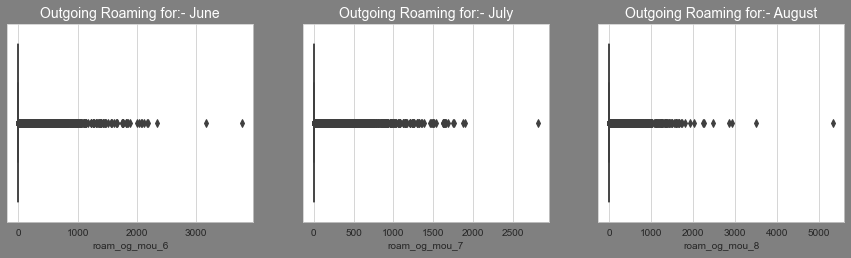

In [41]:
# Analysing the distribution of some important fields in each month using box plot.
import seaborn as sns
plt.figure(figsize=(15,8),facecolor='grey')
sns.set_style("whitegrid")
# subplot 1
plt.subplot(2, 3, 1)
ax = sns.boxplot(high_val_cust['roam_og_mou_6'])
ax.set_title('Outgoing Roaming for:- June',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 2)
ax = sns.boxplot(high_val_cust['roam_og_mou_7'])
ax.set_title('Outgoing Roaming for:- July',fontsize=14,color='w')
# subplot 2
plt.subplot(2, 3, 3)
ax = sns.boxplot(high_val_cust['roam_og_mou_8'])
ax.set_title('Outgoing Roaming for:- August',fontsize=14,color='w')
plt.show()



> ### Observation
> #### August's roaming usage is significantly lower than that of June and July.This downward trend indicates that the customer is dissatisfied with his or her current telecom connection.



###  Obtaining and analysing the recharge amount columns

In [42]:
recharge_amnt_columns =  high_val_cust.columns[high_val_cust.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

### Creating a function for plotting comparison box plots for the months of June, July, and August

In [43]:
# Function for creating comparison box plot for  6th, 7th and 8th month
def comp_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = high_val_cust
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

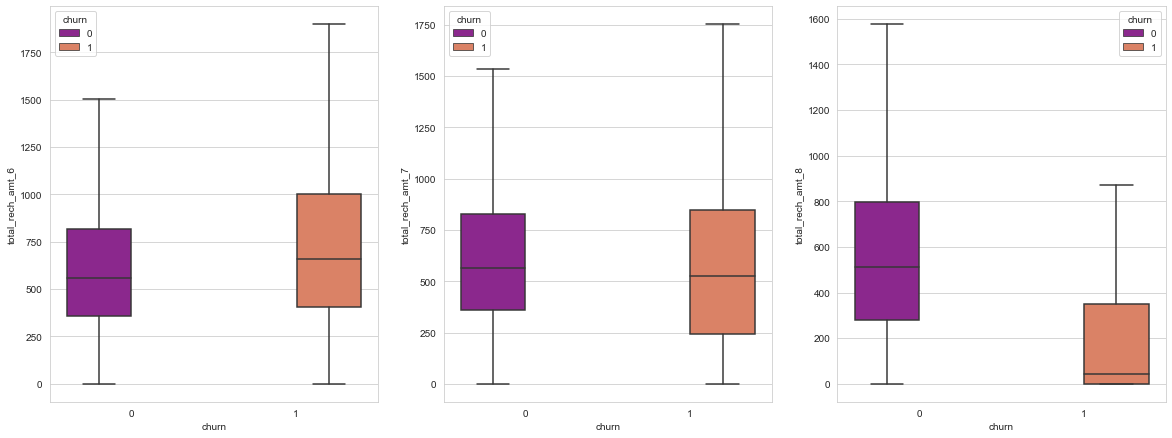

In [44]:
# Ploting total recharge amount
comp_box_chart('total_rech_amt')

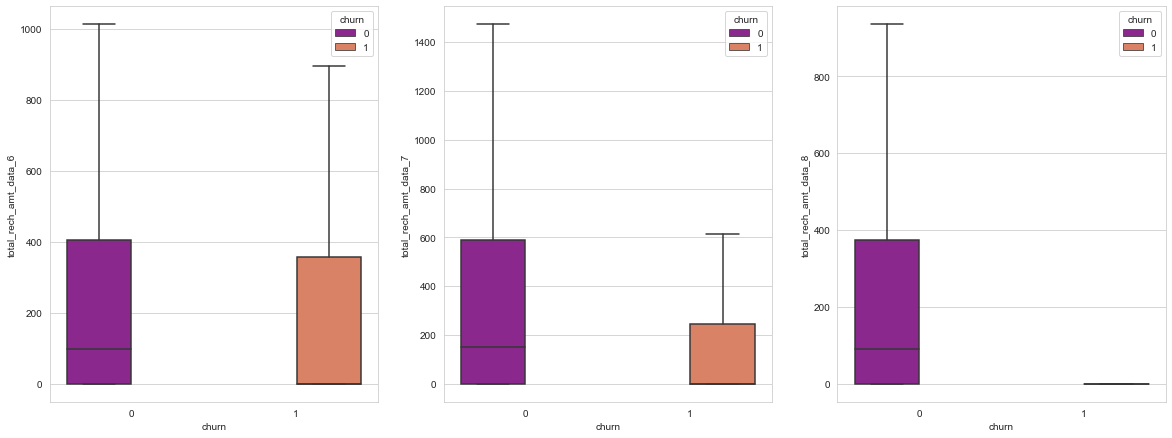

In [45]:
# Ploting total recharge amount spent for data
comp_box_chart('total_rech_amt_data')

> ### Observation
> #### We can see a significant decline in the overall recharge amount for churned customers throughout the action period (8th month).

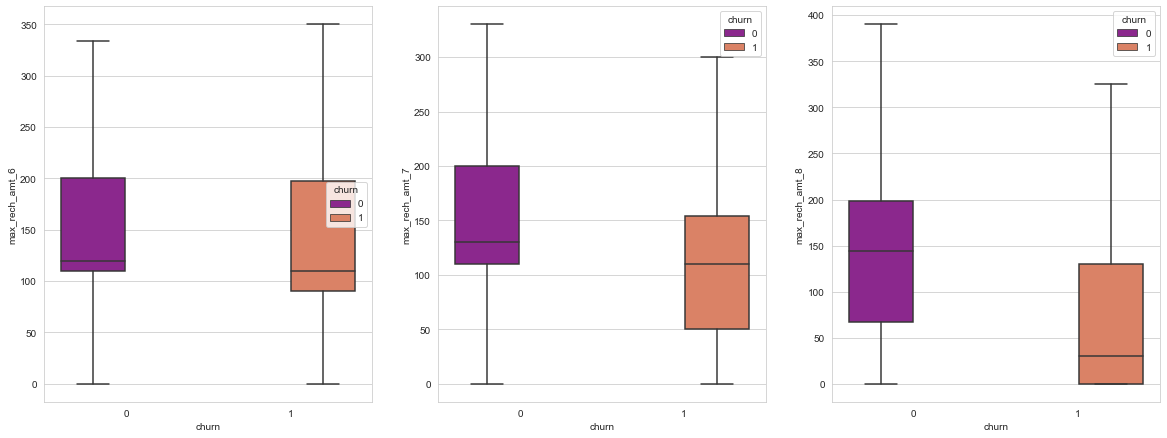

In [46]:
# Ploting maximum recharge amount for data:
comp_box_chart('max_rech_amt')

> ### Observation
> #### We can see a significant decline in maximum recharge amount for churned customers throughout the action phase (8th moth).

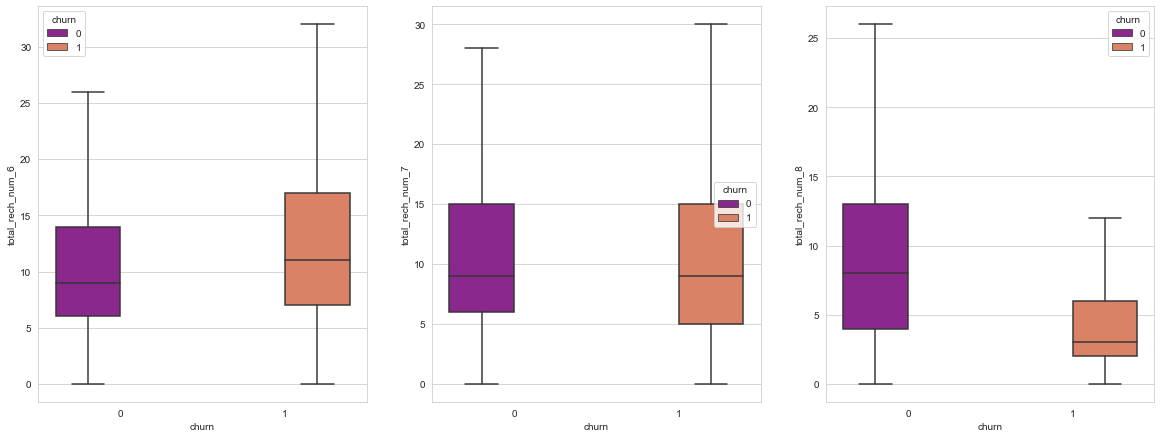

In [47]:
# Ploting total number of recharges
comp_box_chart('total_rech_num')

> ### Observation
> #### We can see a significant decline in total recharge number for churned customers throughout the action phase (8th moth).

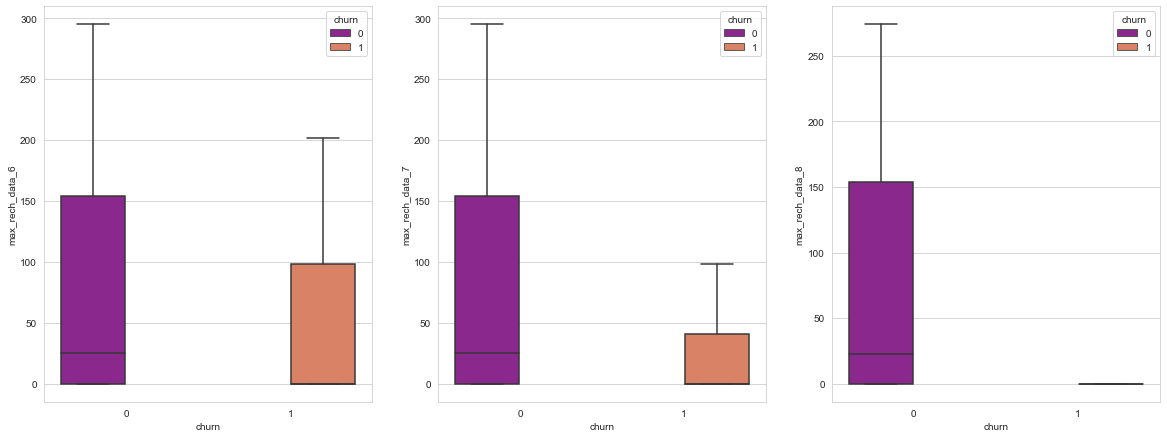

In [48]:
# Ploting maximum recharge for data
comp_box_chart('max_rech_data')

> ### Observation
> #### We can see a significant decline in maximum rechareg for data for churned customers throughout the action phase (8th moth).

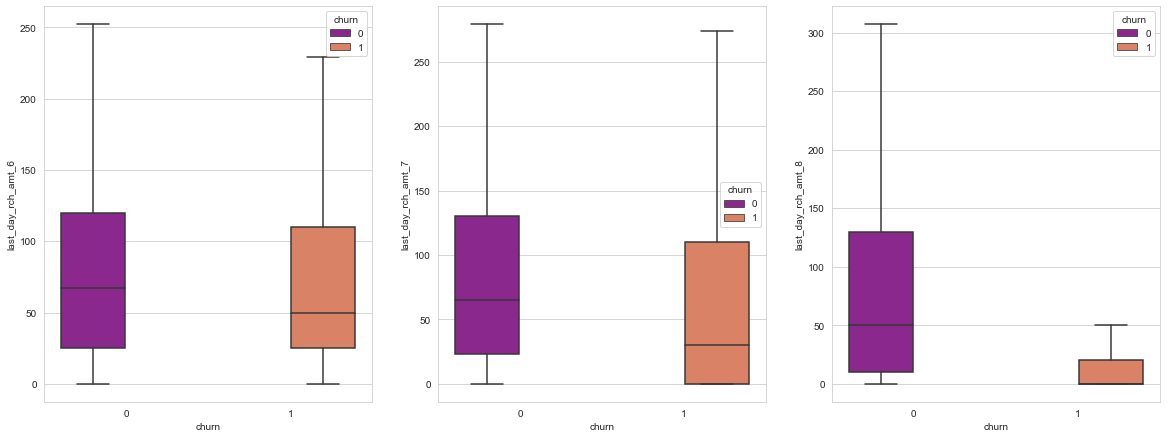

In [49]:
# Ploting last day recharge amount
comp_box_chart('last_day_rch_amt')

> ### Observation
> #### We can see a significant decline in last day recharge amount for data for churned customers throughout the action phase (8th moth).

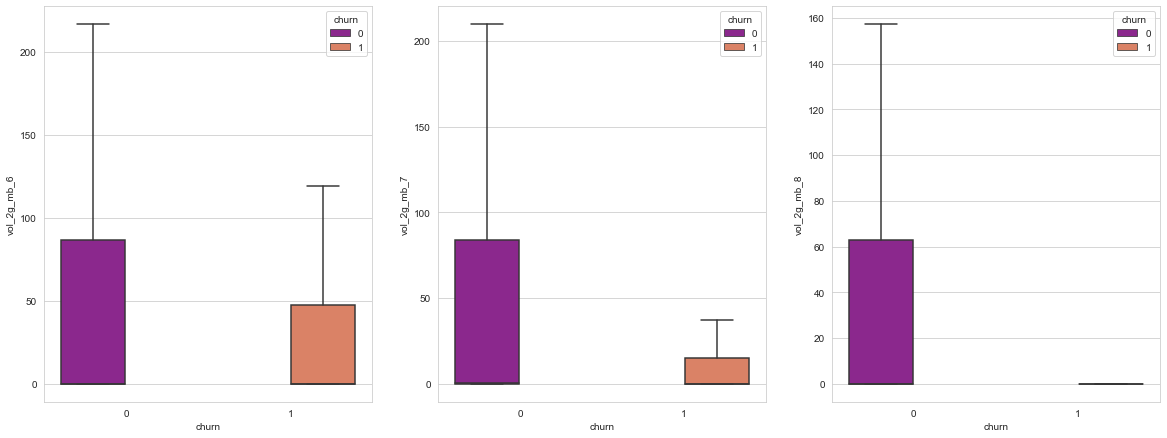

In [50]:
# Ploting volume of 2G and 3G usage columns
comp_box_chart('vol_2g_mb')

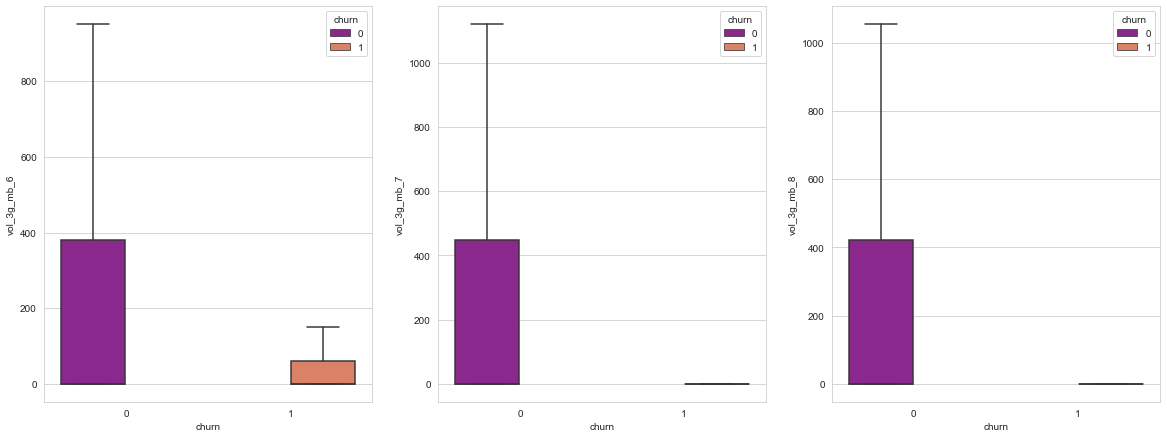

In [51]:
comp_box_chart('vol_3g_mb')

> #### Observation
> #### We saw a noticeable decline in 2G and 3G usage among churned customers. There is a potential that the churned clients live in areas with inadequate 2G and 3G coverage. This, in turn, created the conditions for churning.

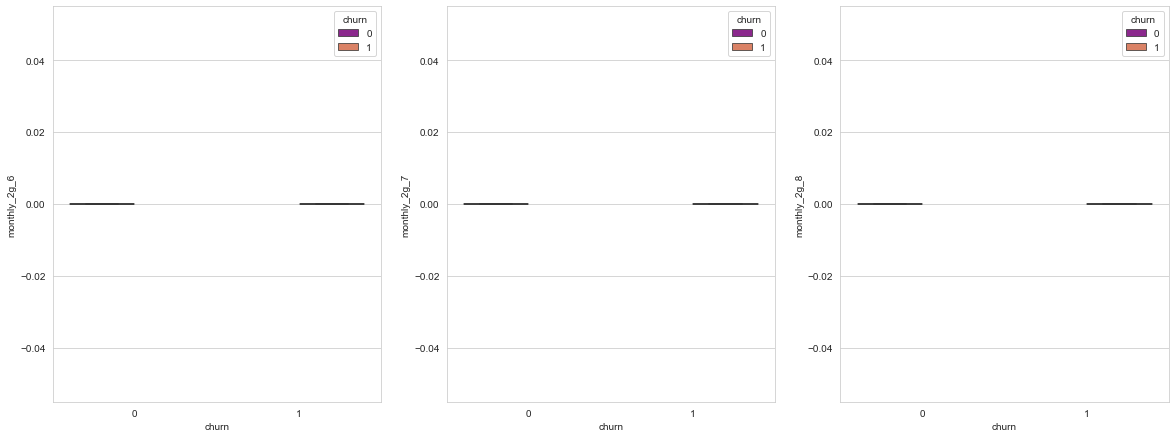

In [52]:
# Ploting monthly subscription
comp_box_chart('monthly_2g')

> ### Observation
> #### This chart does not provide us with sufficient data for analysis. For further study, let's create a bar graph with the mean value.

### Creating a function for plotting mean bar charts

In [53]:
def mean_bar_chart(df,columns_list):
    df_0 = df[df.churn==0].filter(columns_list)
    df_1 = df[df.churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()
    
    return mean_bar

In [54]:
# Concatenating the 2g, 3g subscription fields for plotting bar chart
monthly_subcription_2g_3g = high_val_cust.columns[high_val_cust.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

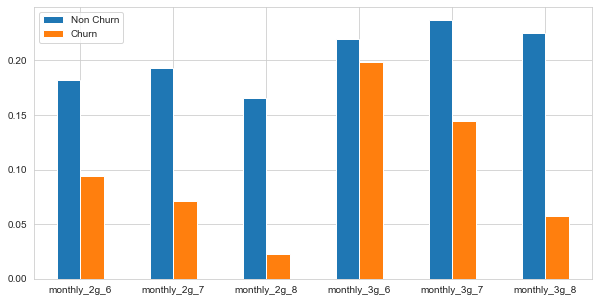

,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8
Non Churn,0.181613,0.193096,0.165080,0.219840,0.236882,0.224891
Churn,0.093711,0.071106,0.023017,0.198109,0.144266,0.057131


In [55]:
# Comparing the montly 2g and 3g subscription for churn and non-churn customers
mean_bar_chart(high_val_cust, monthly_subcription_2g_3g)

In [56]:
# Renaming month names jun, jul, aug in volume baed cost (vbc) columns to 6,7,8,9 format to match other columns
high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8','sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# Dropping 9th month column as it is not needed for model building
high_val_cust.drop('vbc_3g_9',axis=1,inplace=True)

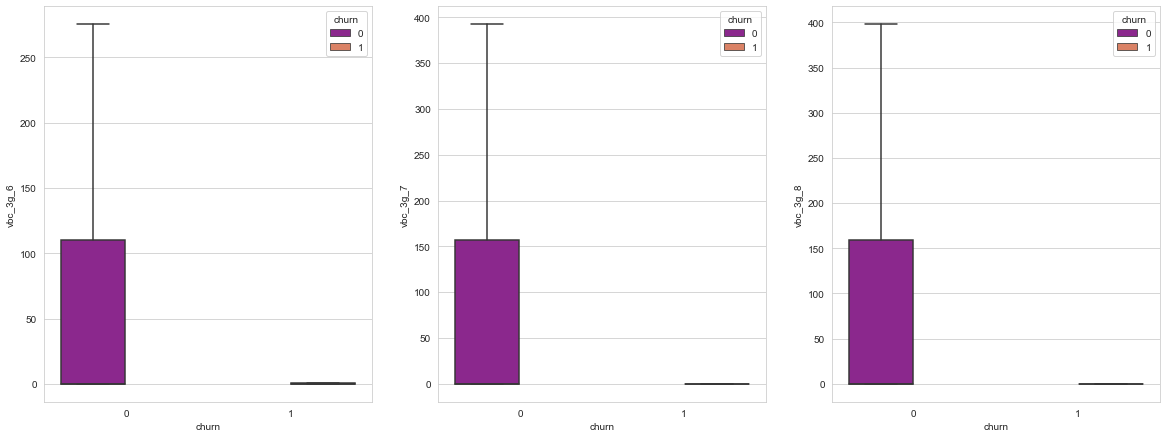

In [57]:
# Ploting vbc_3g for analysis of volume based cost comparison for churn and non-churn customers
comp_box_chart('vbc_3g')

In [58]:
# Storing all vbc columns to a list for plotting bar graph
vbc_column = high_val_cust.columns[high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

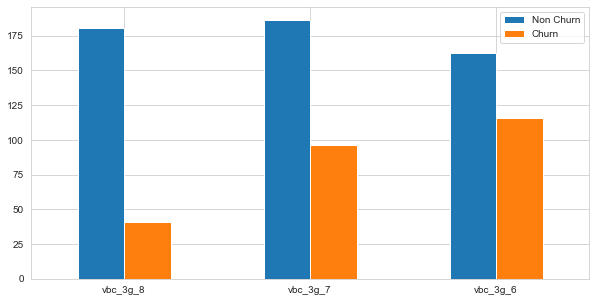

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Non Churn,180.622636,186.370503,162.557305
Churn,40.940884,96.340707,115.461780


In [59]:
# Plotting vbc columns for comparison
mean_bar_chart(high_val_cust, vbc_column)

> ### Observation
> #### The volume-based cost (vbc) of 3G is significantly lower for churned customers than for non-churned customers.

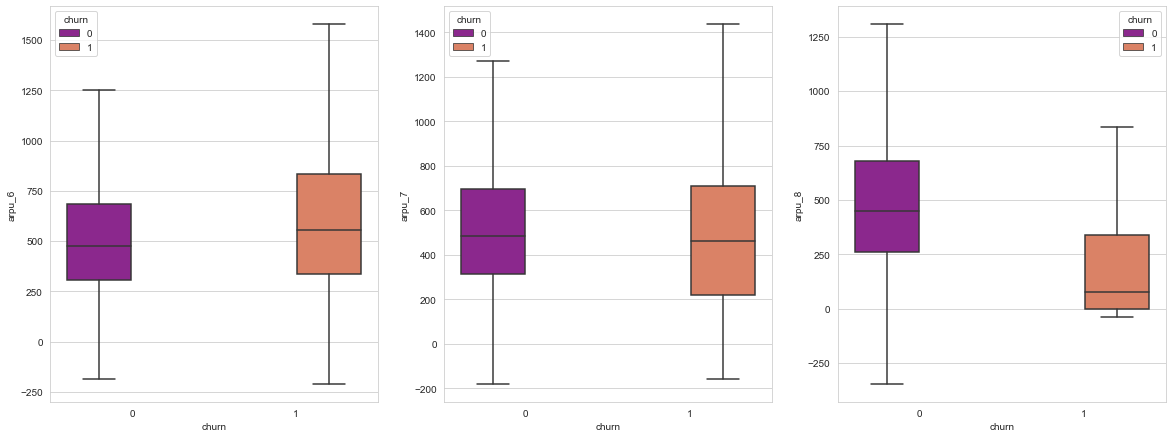

In [60]:
# Checking average revenue per user columns for churn and non churn
arpu_cols = high_val_cust.columns[high_val_cust.columns.str.contains('arpu_')]

# Plotting arpu columns for comparison
comp_box_chart('arpu')

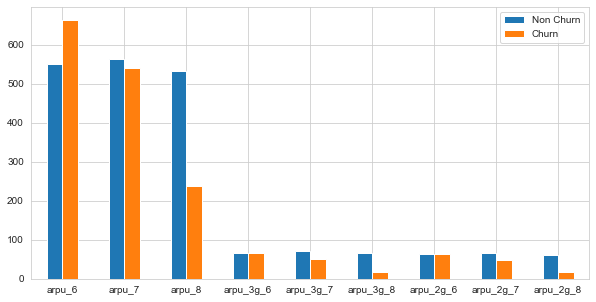

,arpu_6,arpu_7,arpu_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
Non Churn,549.546959,562.929990,532.869746,67.208714,70.388267,66.784624,63.522835,66.210768,62.054402
Churn,663.709368,541.146131,237.655478,65.822947,49.851702,18.128759,63.594760,48.761932,17.741245


In [61]:
# Plotting mean bar chart for comparing all ARPU columns
mean_bar_chart(high_val_cust, arpu_cols)

> ### Observation
> #### When churned customers are compared to non-churned customers, the average revenue per user (ARPU) decreases significantly in the eighth month.

### Model Building

#### Performing Principal Component Analysis (PCA) before modelling

In [62]:
# Taking a copy of the dataframe before doing other activities
high_val_cust1 = high_val_cust

In [63]:
# Let us Look the Shape and Info of Dataset

print("Checking the Shape of the dataSet")
print("--------------------------------\n")
print(high_val_cust1.shape)
print("=================================\n")
print("Checking the Info attributes and stats of the dataSet")
print("--------------------------------------------------\n")
print(high_val_cust1.info())

Checking the Shape of the dataSet
--------------------------------

(29953, 167)

Checking the Info attributes and stats of the dataSet
--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 167 entries, last_date_of_month_6 to churn
dtypes: datetime64[ns](6), float64(132), int32(3), int64(26)
memory usage: 39.3 MB
None


In [64]:
high_val_cust1.head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
0,2014-06-30,2014-07-31,2014-08-31,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,1
7,2014-06-30,2014-07-31,2014-08-31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,2014-06-27,2014-07-25,2014-08-26,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [65]:
high_val_cust1.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,churn
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,299

In [66]:
# Removing the date fields as it is not useful for modelling 
high_val_cust1.drop(['aon'], axis=1, inplace=True)

In [67]:
col_to_drop = list(high_val_cust1.select_dtypes(include=['datetime']).columns)

In [68]:
print(col_to_drop)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [69]:
high_val_cust1.drop(col_to_drop, axis=1, inplace=True)

### Train Test Split

In [70]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X = high_val_cust1.drop(['churn'], axis=1)
y = high_val_cust1['churn']    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

### Perform MinMax scaler before performing PCA

In [71]:
# Importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [72]:
# fit transform the scaler on train
X_train = scaler.fit_transform(X_train)
# transform test using the already fit scaler
X_test = scaler.transform(X_test)

### Handling class imbalance using smote

In [73]:
# Checking the stats before sampling
print("counts of label '1':",sum(y_train==1))
print("counts of label '0':",sum(y_train==0))

counts of label '1': 1752
counts of label '0': 19215


In [74]:
# Performing oversampling using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_smo, y_train_smo = sm.fit_sample(X_train, y_train)

In [75]:
# Stats after smote
print("counts of label '1':",sum(y_train_smo==1))
print("counts of label '0':",sum(y_train_smo==0))

counts of label '1': 19215
counts of label '0': 19215


In [76]:
# Performing PCA on sampled data
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [77]:
# Fitting PCA on the train dataset
pca.fit(X_train_smo)

PCA(random_state=42, svd_solver='randomized')

In [78]:
# Variance ratio
pca.explained_variance_ratio_[:50]

array([0.54962996, 0.12395377, 0.08596459, 0.02645379, 0.02553412,
       0.01989028, 0.01961309, 0.01502192, 0.01183865, 0.00893219,
       0.00800085, 0.00764161, 0.00636769, 0.0059214 , 0.00500292,
       0.00456677, 0.00414671, 0.00391858, 0.00389134, 0.00365877,
       0.00333031, 0.00309394, 0.0030239 , 0.00287003, 0.00259727,
       0.00244915, 0.00243319, 0.00239676, 0.00220472, 0.00213734,
       0.00183242, 0.00170427, 0.00152387, 0.001381  , 0.00134874,
       0.00122201, 0.00119702, 0.0011505 , 0.00112626, 0.00106801,
       0.00095014, 0.00084704, 0.00081064, 0.00077045, 0.00075709,
       0.00071364, 0.00069095, 0.00064189, 0.00062155, 0.0006081 ])

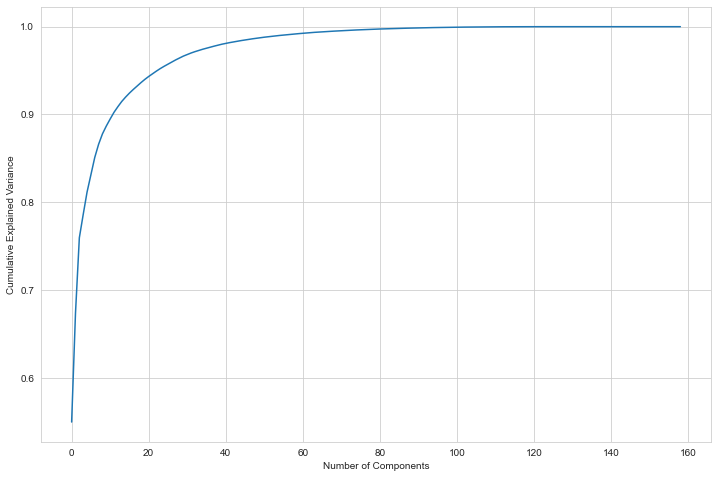

In [79]:
# Plotting cumulative variance and number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

#### Plot shows that 60 components are enough to explain close to 95% variance

In [80]:
# Performing incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_again = IncrementalPCA(n_components=60)

In [81]:
# Fitting on train data
X_train_pca = pca_again.fit_transform(X_train_smo)
X_train_pca.shape

(38430, 60)

In [82]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("Max Correlation:",corrmat_nodiag.max(), ", Min Correlation: ", corrmat_nodiag.min(),)

Max Correlation: 0.03366354636358724 , Min Correlation:  -0.057567564750966436


In [83]:
# Applying selected 60 components to the test data
X_test_pca = pca_again.transform(X_test)
X_test_pca.shape

(8986, 60)

### Modeling : Logistic Regression

In [84]:
# Fitting train model on train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
learner_pca2 = LogisticRegression(class_weight='balanced')
learner_pca2.fit(X_train_pca,y_train_smo)

LogisticRegression(class_weight='balanced')

In [85]:
# Prediction on training set
dtrain_predictions = learner_pca2.predict(X_train_pca)
dtrain_predprob = learner_pca2.predict_proba(X_train_pca)[:,1]

In [86]:
# Checking scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, dtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, dtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, dtrain_predprob))

Accuracy : 0.8360655737704917
Recall/Sensitivity : 0.8538121259432735
AUC Score (Train): 0.9088666106155004


In [87]:
# Performing prediction on test dataset.
pred_probs_test = learner_pca2.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8178060913714559
precision score: 0.26298549368273283
Sensitivity/Recall : 0.8252569750367107
Specificity: 0.8103552077062011
False Positive Rate: 0.1896447922937989
Positive predictive value: 0.26298549368273283
Negative Predictive value: 0.9826252007592349
Accuracy : 0.8114845314934342


In [88]:
# Applying probability cutoff as 0.5
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.083818,0
1,0,0.885428,1
2,0,0.202532,0
3,0,0.084803,0
4,0,0.047354,0


In [89]:
# Defining a function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

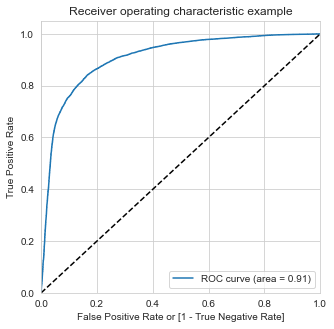

In [91]:
# Plotting roc curve
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [92]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.083818,0,1,0,0,0,0,0,0,0,0,0
1,0,0.885428,1,1,1,1,1,1,1,1,1,1,0
2,0,0.202532,0,1,1,1,0,0,0,0,0,0,0
3,0,0.084803,0,1,0,0,0,0,0,0,0,0,0
4,0,0.047354,0,1,0,0,0,0,0,0,0,0,0


In [93]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.685038  0.979547  0.390528
0.2   0.2  0.752511  0.959719  0.545303
0.3   0.3  0.793599  0.931460  0.655738
0.4   0.4  0.821910  0.897684  0.746136
0.5   0.5  0.836066  0.853812  0.818319
0.6   0.6  0.834374  0.791985  0.876763
0.7   0.7  0.821832  0.724122  0.919542
0.8   0.8  0.792142  0.631590  0.952693
0.9   0.9  0.594093  0.200520  0.987666


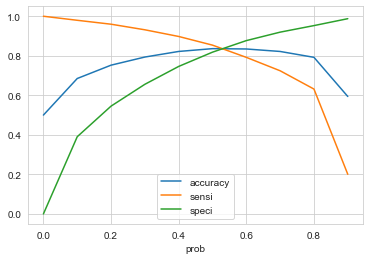

In [94]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.47 is the optimum point to take it as a cutoff probability

In [95]:
# Applying cutoff probability
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.47 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.083818,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.885428,1,1,1,1,1,1,1,1,1,1,0,1
2,0,0.202532,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.084803,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.047354,0,1,0,0,0,0,0,0,0,0,0,0


In [96]:
# Predicting on train dataset with optimal cutoff probability
y_train_pred = learner_pca2.predict_proba(X_train_pca)[:,1]
y_train_pred_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_pred})
y_train_pred_final['Churn_Prob'] = y_train_pred
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.47 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,0,0.083818,0
1,0,0.885428,1
2,0,0.202532,0
3,0,0.084803,0
4,0,0.047354,0


In [97]:
# Printing all scores of train dataset
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_pred_final.Churn, y_train_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.832110330470986
precision score: 0.8103993384892262
Sensitivity/Recall : 0.8670830080666146
Specificity: 0.7971376528753578
False Positive Rate: 0.2028623471246422
Positive predictive value: 0.8103993384892262
Negative Predictive value: 0.8570869005651615


In [98]:
# Predicting on test datset with optimal cutoff 0.47
y_test_pred = learner_pca2.predict_proba(X_test_pca)[:,1]
y_test_pred_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_pred})
y_test_pred_final['Churn_Prob'] = y_test_pred
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.47 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.115337,0
29754,0,0.016002,0
50131,0,0.034296,0
66630,0,0.082344,0
91920,0,0.276614,0


In [99]:
# Printing all scores of test dataset
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print('precision score :',(metrics.precision_score(y_test_pred_final.Churn, y_test_pred_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8134567662210105
precision score : 0.24527491408934707
Sensitivity/Recall : 0.8384728340675477
Specificity: 0.7884406983744732
False Positive Rate: 0.2115593016255268
Positive predictive value: 0.24527491408934707
Negative Predictive value: 0.9834785220787023


### Observations
##### Stats with logistics regression on Test Dataset is:-
1. Sensitivity/Recall : 0.8384728340675477
2. Specificity: 0.7884406983744732

##### Stats On Train dataset:-
1. Sensitivity/Recall : 0.8670830080666146
2. Specificity: 0.7971376528753578

### Random forest Modeling

Finding the optimum value of max_depth

In [100]:
# Using GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'max_depth': range(10, 30, 5)}
rf = RandomForestClassifier()
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                 return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [101]:
# Scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,14.782054,0.102802,0.090141,0.006300,10,{'max_depth': 10},0.890580,0.893573,0.904111,0.887978,0.886677,0.892584,0.006229,4,0.925059,0.923042,0.922749,0.923627,0.922066,0.923309,0.001009
1,18.501831,0.154278,0.131415,0.021397,15,{'max_depth': 15},0.939500,0.943273,0.946656,0.939500,0.937028,0.941192,0.003384,3,0.981785,0.981492,0.982923,0.981720,0.981655,0.981915,0.000513
2,22.119185,3.002791,0.145900,0.006163,20,{'max_depth': 20},0.948478,0.951080,0.953422,0.950299,0.946786,0.950013,0.002263,2,0.993300,0.993169,0.993007,0.993267,0.993039,0.993156,0.000117
3,21.359503,0.085084,0.137713,0.010766,25,{'max_depth': 25},0.952641,0.954593,0.955113,0.952511,0.951861,0.953344,0.001271,1,0.997138,0.997268,0.997430,0.997235,0.997398,0.997294,0.000108


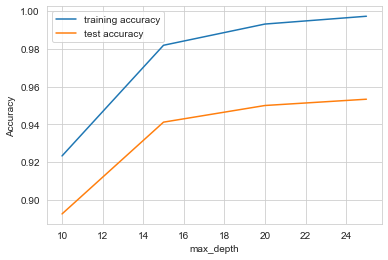

In [102]:
# Plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation
max_depth 20 looks optimal. If you further increase this value, the model will overfit.

### Tuning n_estimators
To learn how the value of n estimators affects overall accuracy, finding the ideal values for n_estimators.

The value of max depth should be minimal to avoid overfitting the trees.

In [103]:
# Using GridSearchCV to find out optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'n_estimators': range(50, 150, 25)}
rf = RandomForestClassifier(max_depth=20)
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=20),
             param_grid={'n_estimators': range(50, 150, 25)},
             return_train_score=True, scoring='accuracy')

In [104]:
# Printing scores of GridSearchCV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,10.185620,0.081013,0.062463,0.007494,50,{'n_estimators': 50},0.946396,0.951600,0.952511,0.950039,0.943794,0.948868,0.003285,4,0.992779,0.992714,0.992649,0.992877,0.992681,0.992740,0.000081
1,15.274914,0.116460,0.091902,0.006352,75,{'n_estimators': 75},0.948868,0.951600,0.953682,0.950429,0.949128,0.950742,0.001766,3,0.992909,0.993137,0.992551,0.993202,0.992812,0.992922,0.000234
2,20.456188,0.098010,0.132529,0.005453,100,{'n_estimators': 100},0.947437,0.952641,0.954983,0.951470,0.949128,0.951132,0.002642,2,0.992812,0.993072,0.992681,0.993072,0.993072,0.992942,0.000165
3,27.377787,3.072664,0.165138,0.008860,125,{'n_estimators': 125},0.950820,0.950429,0.954723,0.950690,0.949649,0.951262,0.001777,1,0.992812,0.992389,0.992779,0.993169,0.993365,0.992903,0.000338


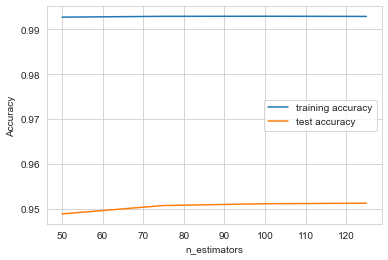

In [105]:
# Plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The value of n_estimators = 80 looks optimal

#### Tuning max_features
Checking the model performance by providing various values for max_features

In [106]:
# Using GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=20,n_estimators=80)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, n_estimators=80),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [107]:
# Printing scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.777531,0.052943,0.108398,0.007711,4,{'max_features': 4},0.947697,0.951600,0.953162,0.949519,0.947957,0.949987,0.002110,2,0.993039,0.993560,0.993104,0.993365,0.993072,0.993228,0.000202
1,18.521605,0.125904,0.108154,0.006278,8,{'max_features': 8},0.949128,0.952641,0.954593,0.949128,0.948348,0.950768,0.002424,1,0.992616,0.992877,0.992877,0.992909,0.992421,0.992740,0.000191
2,33.797284,2.741089,0.113535,0.011826,14,{'max_features': 14},0.948218,0.948348,0.952511,0.948868,0.949909,0.949571,0.001586,4,0.991868,0.991868,0.991348,0.991966,0.991868,0.991784,0.000221
3,48.672964,2.274470,0.108696,0.003882,20,{'max_features': 20},0.948478,0.947177,0.951600,0.950429,0.949128,0.949362,0.001534,5,0.991738,0.991478,0.991478,0.991511,0.991153,0.991472,0.000187
4,54.518044,0.539725,0.114565,0.029955,24,{'max_features': 24},0.946786,0.951210,0.953682,0.949779,0.948348,0.949961,0.002372,3,0.991380,0.991218,0.990762,0.991283,0.991445,0.991218,0.000241


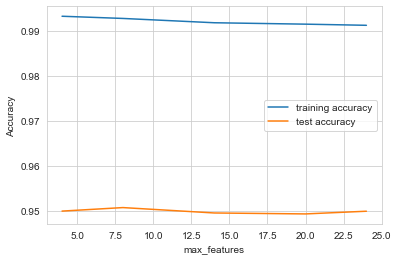

In [108]:
# Plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Selecting max_features = 5

#### Tuning min_samples_leaf

The hyperparameter min_samples_leaf is the minimum number of samples required to be at a leaf node:

If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [109]:
# Using GridSearchCV to find out the optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'min_samples_leaf': range(100, 400, 50)}
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5)
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              n_estimators=80),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [110]:
# Printing scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.104592,0.103595,0.077176,0.002245,100,{'min_samples_leaf': 100},0.844913,0.850507,0.857793,0.843872,0.848556,0.849128,0.004954,1,0.866283,0.860981,0.858542,0.859908,0.862054,0.861553,0.002635
1,7.489674,0.092242,0.068420,0.008456,150,{'min_samples_leaf': 150},0.829430,0.839709,0.846995,0.833854,0.835805,0.837158,0.005928,2,0.850703,0.845693,0.844555,0.848881,0.846246,0.847216,0.002248
2,7.512298,0.449368,0.065637,0.008258,200,{'min_samples_leaf': 200},0.824096,0.832292,0.842961,0.825267,0.829170,0.830757,0.006758,3,0.841498,0.836716,0.837627,0.839188,0.837399,0.838486,0.001710
3,6.775671,0.071926,0.064031,0.009467,250,{'min_samples_leaf': 250},0.816419,0.823445,0.836716,0.822404,0.824486,0.824694,0.006631,4,0.831056,0.828747,0.831349,0.833594,0.829202,0.830790,0.001728
4,6.469409,0.111458,0.067679,0.006560,300,{'min_samples_leaf': 300},0.812386,0.818241,0.832162,0.816680,0.822014,0.820297,0.006688,5,0.828552,0.825234,0.827381,0.827674,0.828227,0.827413,0.001164


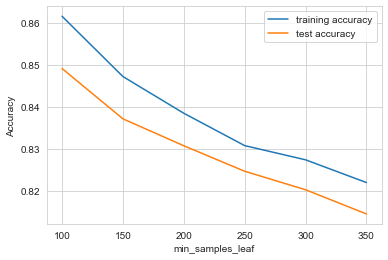

In [111]:
# Plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_leaf 100 looks optimal

#### Tuning min_samples_split
Varying the min_samples_split to check the performance of ensemble.

In [112]:
# Using GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

n_folds = 5
parameters = {'min_samples_split': range(50, 300, 50)}
rf = RandomForestClassifier(max_depth=20,n_estimators=80,max_features=5,min_samples_leaf=100)
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_train_pca, y_train_smo)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=20, max_features=5,
                                              min_samples_leaf=100,
                                              n_estimators=80),
             param_grid={'min_samples_split': range(50, 300, 50)},
             return_train_score=True, scoring='accuracy')

In [113]:
# Printing scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.117504,0.091738,0.082601,0.016083,50,{'min_samples_split': 50},0.840229,0.849857,0.859355,0.849467,0.846604,0.849102,0.006177,2,0.865340,0.860558,0.860103,0.865990,0.859843,0.862367,0.002711
1,8.335293,0.247946,0.076334,0.013182,100,{'min_samples_split': 100},0.841140,0.849987,0.862347,0.844392,0.848035,0.849180,0.007251,1,0.863876,0.859680,0.861534,0.862119,0.860883,0.861619,0.001389
2,8.214073,0.312167,0.076731,0.010503,150,{'min_samples_split': 150},0.840619,0.851939,0.857793,0.845173,0.846734,0.848452,0.005907,3,0.864266,0.863030,0.859062,0.863778,0.860786,0.862184,0.001964
3,8.273080,0.402610,0.066445,0.006172,200,{'min_samples_split': 200},0.840359,0.848816,0.858704,0.845303,0.848296,0.848296,0.006009,4,0.864982,0.859485,0.861566,0.863160,0.859094,0.861658,0.002218
4,8.015935,0.106155,0.071097,0.007074,250,{'min_samples_split': 250},0.838147,0.848296,0.856232,0.844262,0.847775,0.846942,0.005888,5,0.861111,0.856687,0.855842,0.859778,0.859355,0.858555,0.001976


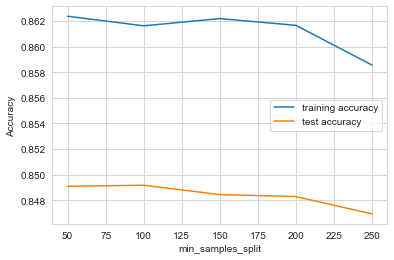

In [114]:
# Plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_samples_split 100 looks optimal

### Fitting the final model with the best parameters obtained.

Finding the optimal hyperparameters using GridSearchCV.

In [115]:
# Creating a model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=20,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80,
                             random_state=10)

In [116]:
# fit on train data
rf_pca=rfc.fit(X_train_pca,y_train_smo)
#Predict on training set
rtrain_predictions = rf_pca.predict(X_train_pca)
rtrain_predprob = rf_pca.predict_proba(X_train_pca)[:,1]

In [117]:
# Checking scores
print ("Accuracy :",metrics.roc_auc_score(y_train_smo, rtrain_predictions))
print ("Recall/Sensitivity :",metrics.recall_score(y_train_smo, rtrain_predictions))
print ("AUC Score (Train):",metrics.roc_auc_score(y_train_smo, rtrain_predprob))

Accuracy : 0.8685141816289358
Recall/Sensitivity : 0.8606297163674212
AUC Score (Train): 0.9422430149162595


In [118]:
# Predicting on test dataset
pred_probs_test = rf_pca.predict(X_test_pca)
confusion = metrics.confusion_matrix(y_test, pred_probs_test)
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_test, pred_probs_test)))
print('precision score:',(metrics.precision_score(y_test, pred_probs_test)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))
print("Accuracy :",(metrics.accuracy_score(y_test,pred_probs_test)))

Roc_auc_score : 0.8066221629310582
precision score: 0.3078773301262778
Sensitivity/Recall : 0.7518355359765051
Specificity: 0.8614087898856111
False Positive Rate: 0.13859121011438894
Positive predictive value: 0.3078773301262778
Negative Predictive value: 0.9769220264918749
Accuracy : 0.8531048297351436


In [119]:
# Checking with probability cutoff 0.5
y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.206940,0
1,0,0.767566,1
2,0,0.293529,0
3,0,0.198769,0
4,0,0.140550,0


In [120]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_predrf_final[i]= y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.206940,0,1,1,1,0,0,0,0,0,0,0
1,0,0.767566,1,1,1,1,1,1,1,1,1,0,0
2,0,0.293529,0,1,1,1,0,0,0,0,0,0,0
3,0,0.198769,0,1,1,0,0,0,0,0,0,0,0
4,0,0.140550,0,1,1,0,0,0,0,0,0,0,0


In [121]:
# Calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.530887  1.000000  0.061775
0.2   0.2  0.673875  0.997710  0.350039
0.3   0.3  0.800677  0.977518  0.623836
0.4   0.4  0.856258  0.929378  0.783138
0.5   0.5  0.868514  0.860630  0.876399
0.6   0.6  0.845615  0.756388  0.934843
0.7   0.7  0.781915  0.593130  0.970700
0.8   0.8  0.684101  0.378038  0.990164
0.9   0.9  0.554072  0.108977  0.999167


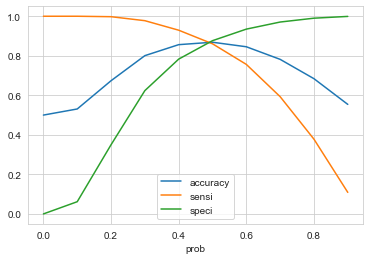

In [122]:
# Plotting accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.45 is the optimum cutoff probability.

In [123]:
# Applying 0.45 as the cutoff probability on train dataset
y_train_predrf_final['final_predicted'] = y_train_predrf_final.Churn_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_predrf = rf_pca.predict_proba(X_train_pca)[:,1]
y_train_predrf_final = pd.DataFrame({'Churn':y_train_smo, 'Churn_Prob':y_train_predrf})
y_train_predrf_final['Churn_Prob'] = y_train_predrf
y_train_predrf_final['predicted'] = y_train_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_train_predrf_final.head()

,Churn,Churn_Prob,predicted
0,0,0.206940,0
1,0,0.767566,1
2,0,0.293529,0
3,0,0.198769,0
4,0,0.140550,0


In [124]:
# Checking the scores of train dataset
confusion = metrics.confusion_matrix(y_train_predrf_final.Churn, y_train_predrf_final.predicted)
TP = confusion[1,1] # True positive 
TN = confusion[0,0] # True negatives
FP = confusion[0,1] # False positives
FN = confusion[1,0] # False negatives
print("Roc_auc_score :",(metrics.roc_auc_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('precision score:',(metrics.precision_score(y_train_predrf_final.Churn, y_train_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8677595628415301
precision score: 0.8458714698252655
Sensitivity/Recall : 0.8994015092375748
Specificity: 0.8361176164454853
False Positive Rate: 0.1638823835545147
Positive predictive value: 0.8458714698252655
Negative Predictive value: 0.8926051447302628


In [125]:
# Predicting on test datset with 0.45 as the optimal cutoff
y_test_predrf = rf_pca.predict_proba(X_test_pca)[:,1]
y_test_predrf_final = pd.DataFrame({'Churn':y_test, 'Churn_Prob':y_test_predrf})
y_test_predrf_final['Churn_Prob'] = y_test_predrf
y_test_predrf_final['predicted'] = y_test_predrf_final.Churn_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_test_predrf_final.head()

,Churn,Churn_Prob,predicted
48388,0,0.280837,0
29754,0,0.117337,0
50131,0,0.183652,0
66630,0,0.234953,0
91920,0,0.409140,0


In [126]:
# Checking scores of test dataset
confusion = metrics.confusion_matrix(y_test_predrf_final.Churn, y_test_predrf_final.predicted)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("Roc_auc_score :",metrics.roc_auc_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted))
print('precision score :',(metrics.precision_score(y_test_predrf_final.Churn, y_test_predrf_final.predicted)))
print('Sensitivity/Recall :',(TP / float(TP+FN)))
print('Specificity:',(TN / float(TN+FP)))
print('False Positive Rate:',(FP/ float(TN+FP)))
print('Positive predictive value:',(TP / float(TP+FP)))
print('Negative Predictive value:',(TN / float(TN+ FN)))

Roc_auc_score : 0.8131980893628645
precision score : 0.26885406464250733
Sensitivity/Recall : 0.8061674008810573
Specificity: 0.8202287778446719
False Positive Rate: 0.17977122215532812
Positive predictive value: 0.26885406464250733
Negative Predictive value: 0.9809907834101382


#### Train and test Recall score of Random forest:
- Train Sensitivity/Recall : 0.8994015092375748
- Test Sensitivity/Recall : 0.8061674008810573

#### Train and test Recall score with logistics regression :
- Train Sensitivity/Recall : 0.8670830080666146
- Sensitivity/Recall : 0.8384728340675477

> ### Observation
The Recall/Sensitivity score is especially important in this case study since the Telecom firm does not want any high-value customers to churn. Some of the non-churn consumers could be classified as churn by the company. As a result, for a decent model, the overall recall score will be considered. In this scenario, Logistics Regression will be used.

- As can be seen, the Random forest's Train Recall score is higher than Logistics Regression's, but Logistics Regression's Test Recall score is higher than Random forest's.

- For Logistics Regression, the difference between Train and Test score is similarly lower, implying that the model is stable.

- We need to create a new model with the primary purpose of identifying crucial predictor features that will allow the company to anticipate the major churn indicators.

- A logistic regression model or a model from the tree family are good choices for identifying key variables.

- Make sure to take care of multi-collinearity if going forward with logistic regression.

### Recommended strategies to manage customer churn - Random Forest

The most challenging component of logistic regression is interpreting the data accurately. 

Even the most seasoned statistician will have difficulty making precise predictions about the factors that contribute to churn based on a table of outcomes. On the other hand, a decision tree is significantly easier to comprehend.

### Fitting the final model with the best parameters obtained

In [127]:
# Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=100,
                             max_features=5,
                             n_estimators=80)

In [128]:
# fit
rfc.fit(X_train_smo,y_train_smo)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=100, n_estimators=80)

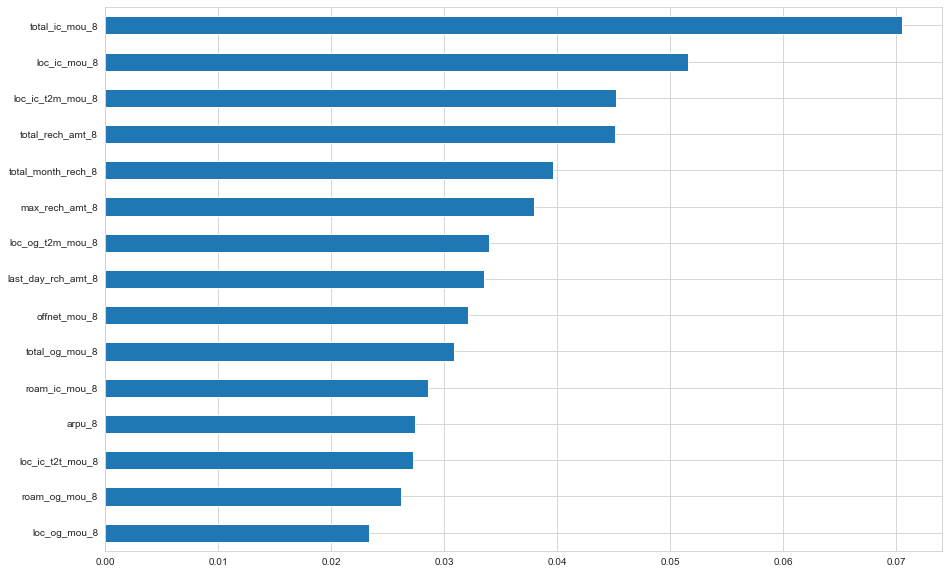

In [129]:
# Plotting important features
plt.figure(figsize=(15,10))
impo_features = pd.Series(rfc.feature_importances_, index=X.columns)
impo_features.nlargest((15)).sort_values().plot(kind='barh', align='center')
plt.show()

> ### Observation
> #### The most crucial 15 characteristics are found in the eighth month (action phase). Any declining trend in these features can be seen as a sign of customer churn.

### Suggestions

### The organisation should pay special attention to the first five significant criteria that influence churn prediction.

#### 1. total_ic_mou_8: Total incoming calls Minutes of usage 8th month
#### 2. loc_ic_t2m_mou_8: Local Incoming calls Operator T to other operator mobile Minutes of usage 8th month
#### 3. total_rech_amt_8: Total recharge amount in 8th month
#### 4. max_rech_amt_8 : Max recharge amount in 8th month
#### 5. total_og_mou_8 : Total Outgoing calls mobile Minutes of usage - voice calls in 8th Month

### We should design campaigns that incentivize our customers to make more calls and utilise their internet more frequently. Perhaps a switch from 2G to 3G with enticing bundles would be beneficial.

### It's worth noting that many individuals are still using 2G networks, which is an interesting fact. It's a great opportunity for us: If we're offering incentives for customers who haven't churned to switch to 3G, they'll be more likely to stay with us.